In [1]:
### Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Reading files

In [87]:
omni = pd.read_csv("Omni Hotels Case Competition_Contact Center Data.csv")

C:\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Exploration / wrangling

In [88]:
omni.head()

,Date,Outlier?,DOW,Interval,Calls_Forecasted,Calls_Received,Calls_Handled,Calls_Abandoned,AHT_Forecasted,AHT_Actual,AHT_Wrap up,ASA,FTEs_Forecasted,FTEs_Actual,Absences_Actual,FTEs_Required,Service_Level%,Occupancy%,Conversion%
0,1/1/2015,NaN,Thu,6:00,12.0,6.0,6.0,NaN,218.0,264.0,0.0,4.0,4.0,3.801111,NaN,1.1,100.00%,13.70%,16.70%
1,1/1/2015,NaN,Thu,6:30,17.0,14.0,14.0,NaN,229.0,371.0,11.0,22.0,5.0,4.850000,NaN,3.60694375,92.90%,32.70%,0.00%
2,1/1/2015,NaN,Thu,7:00,28.0,28.0,21.0,7.0,250.0,363.0,7.0,410.0,8.0,6.503888,NaN,7.0583325,33.30%,70.90%,28.60%
3,1/1/2015,NaN,Thu,7:30,47.0,33.0,33.0,NaN,276.0,220.0,10.0,5.0,12.0,10.590555,NaN,5.04166625,93.90%,48.50%,27.30%
4,1/1/2015,NaN,Thu,8:00,68.0,39.0,39.0,NaN,276.0,264.0,3.0,3.0,16.5,15.621666,NaN,7.15,97.40%,31.50%,33.30%


In [89]:
omni['DateTime'] = omni['Date'] + ' ' + omni['Interval'].astype(str)

In [90]:
omni.head()

,Date,Outlier?,DOW,Interval,Calls_Forecasted,Calls_Received,Calls_Handled,Calls_Abandoned,AHT_Forecasted,AHT_Actual,AHT_Wrap up,ASA,FTEs_Forecasted,FTEs_Actual,Absences_Actual,FTEs_Required,Service_Level%,Occupancy%,Conversion%,DateTime
0,1/1/2015,NaN,Thu,6:00,12.0,6.0,6.0,NaN,218.0,264.0,0.0,4.0,4.0,3.801111,NaN,1.1,100.00%,13.70%,16.70%,1/1/2015 6:00
1,1/1/2015,NaN,Thu,6:30,17.0,14.0,14.0,NaN,229.0,371.0,11.0,22.0,5.0,4.850000,NaN,3.60694375,92.90%,32.70%,0.00%,1/1/2015 6:30
2,1/1/2015,NaN,Thu,7:00,28.0,28.0,21.0,7.0,250.0,363.0,7.0,410.0,8.0,6.503888,NaN,7.0583325,33.30%,70.90%,28.60%,1/1/2015 7:00
3,1/1/2015,NaN,Thu,7:30,47.0,33.0,33.0,NaN,276.0,220.0,10.0,5.0,12.0,10.590555,NaN,5.04166625,93.90%,48.50%,27.30%,1/1/2015 7:30
4,1/1/2015,NaN,Thu,8:00,68.0,39.0,39.0,NaN,276.0,264.0,3.0,3.0,16.5,15.621666,NaN,7.15,97.40%,31.50%,33.30%,1/1/2015 8:00


In [91]:
omni.dtypes

Date                 object
Outlier?             object
DOW                  object
Interval             object
Calls_Forecasted    float64
Calls_Received      float64
Calls_Handled       float64
Calls_Abandoned     float64
AHT_Forecasted      float64
AHT_Actual          float64
AHT_Wrap up         float64
ASA                 float64
FTEs_Forecasted     float64
FTEs_Actual         float64
Absences_Actual     float64
FTEs_Required        object
Service_Level%       object
Occupancy%           object
Conversion%          object
DateTime             object
dtype: object

In [92]:
omni.DateTime.str.slice(-5,-3).astype(int).head()

0    6
1    6
2    7
3    7
4    8
Name: DateTime, dtype: int32

In [93]:
omni.DateTime = pd.to_datetime(omni.DateTime)

In [94]:
omni.head()

,Date,Outlier?,DOW,Interval,Calls_Forecasted,Calls_Received,Calls_Handled,Calls_Abandoned,AHT_Forecasted,AHT_Actual,AHT_Wrap up,ASA,FTEs_Forecasted,FTEs_Actual,Absences_Actual,FTEs_Required,Service_Level%,Occupancy%,Conversion%,DateTime
0,1/1/2015,NaN,Thu,6:00,12.0,6.0,6.0,NaN,218.0,264.0,0.0,4.0,4.0,3.801111,NaN,1.1,100.00%,13.70%,16.70%,2015-01-01 06:00:00
1,1/1/2015,NaN,Thu,6:30,17.0,14.0,14.0,NaN,229.0,371.0,11.0,22.0,5.0,4.850000,NaN,3.60694375,92.90%,32.70%,0.00%,2015-01-01 06:30:00
2,1/1/2015,NaN,Thu,7:00,28.0,28.0,21.0,7.0,250.0,363.0,7.0,410.0,8.0,6.503888,NaN,7.0583325,33.30%,70.90%,28.60%,2015-01-01 07:00:00
3,1/1/2015,NaN,Thu,7:30,47.0,33.0,33.0,NaN,276.0,220.0,10.0,5.0,12.0,10.590555,NaN,5.04166625,93.90%,48.50%,27.30%,2015-01-01 07:30:00
4,1/1/2015,NaN,Thu,8:00,68.0,39.0,39.0,NaN,276.0,264.0,3.0,3.0,16.5,15.621666,NaN,7.15,97.40%,31.50%,33.30%,2015-01-01 08:00:00


In [95]:
omni = omni.fillna(value=0)

In [96]:
omni.dtypes

Date                        object
Outlier?                    object
DOW                         object
Interval                    object
Calls_Forecasted           float64
Calls_Received             float64
Calls_Handled              float64
Calls_Abandoned            float64
AHT_Forecasted             float64
AHT_Actual                 float64
AHT_Wrap up                float64
ASA                        float64
FTEs_Forecasted            float64
FTEs_Actual                float64
Absences_Actual            float64
FTEs_Required               object
Service_Level%              object
Occupancy%                  object
Conversion%                 object
DateTime            datetime64[ns]
dtype: object

In [97]:
omni.DateTime.dt.dayofyear.head()

0    1
1    1
2    1
3    1
4    1
Name: DateTime, dtype: int64

In [98]:
omni.index

RangeIndex(start=0, stop=41508, step=1)

In [99]:
omni.index

RangeIndex(start=0, stop=41508, step=1)

In [100]:
omni = omni.reset_index(drop=True)

In [101]:
omni = omni.set_index('DateTime')

In [102]:
omni.index

DatetimeIndex(['2015-01-01 06:00:00', '2015-01-01 06:30:00',
               '2015-01-01 07:00:00', '2015-01-01 07:30:00',
               '2015-01-01 08:00:00', '2015-01-01 08:30:00',
               '2015-01-01 09:00:00', '2015-01-01 09:30:00',
               '2015-01-01 10:00:00', '2015-01-01 10:30:00',
               ...
               '2018-02-26 19:00:00', '2018-02-26 19:30:00',
               '2018-02-26 20:00:00', '2018-02-26 20:30:00',
               '2018-02-26 21:00:00', '2018-02-26 21:30:00',
               '2018-02-26 22:00:00', '2018-02-26 22:30:00',
               '2018-02-26 23:00:00', '2018-02-26 23:30:00'],
              dtype='datetime64[ns]', name='DateTime', length=41508, freq=None)

In [103]:
omni.head()

,Date,Outlier?,DOW,Interval,Calls_Forecasted,Calls_Received,Calls_Handled,Calls_Abandoned,AHT_Forecasted,AHT_Actual,AHT_Wrap up,ASA,FTEs_Forecasted,FTEs_Actual,Absences_Actual,FTEs_Required,Service_Level%,Occupancy%,Conversion%
DateTime,,,,,,,,,,,,,,,,,,,
2015-01-01 06:00:00,1/1/2015,0,Thu,6:00,12.0,6.0,6.0,0.0,218.0,264.0,0.0,4.0,4.0,3.801111,0.0,1.1,100.00%,13.70%,16.70%
2015-01-01 06:30:00,1/1/2015,0,Thu,6:30,17.0,14.0,14.0,0.0,229.0,371.0,11.0,22.0,5.0,4.850000,0.0,3.60694375,92.90%,32.70%,0.00%
2015-01-01 07:00:00,1/1/2015,0,Thu,7:00,28.0,28.0,21.0,7.0,250.0,363.0,7.0,410.0,8.0,6.503888,0.0,7.0583325,33.30%,70.90%,28.60%
2015-01-01 07:30:00,1/1/2015,0,Thu,7:30,47.0,33.0,33.0,0.0,276.0,220.0,10.0,5.0,12.0,10.590555,0.0,5.04166625,93.90%,48.50%,27.30%
2015-01-01 08:00:00,1/1/2015,0,Thu,8:00,68.0,39.0,39.0,0.0,276.0,264.0,3.0,3.0,16.5,15.621666,0.0,7.15,97.40%,31.50%,33.30%


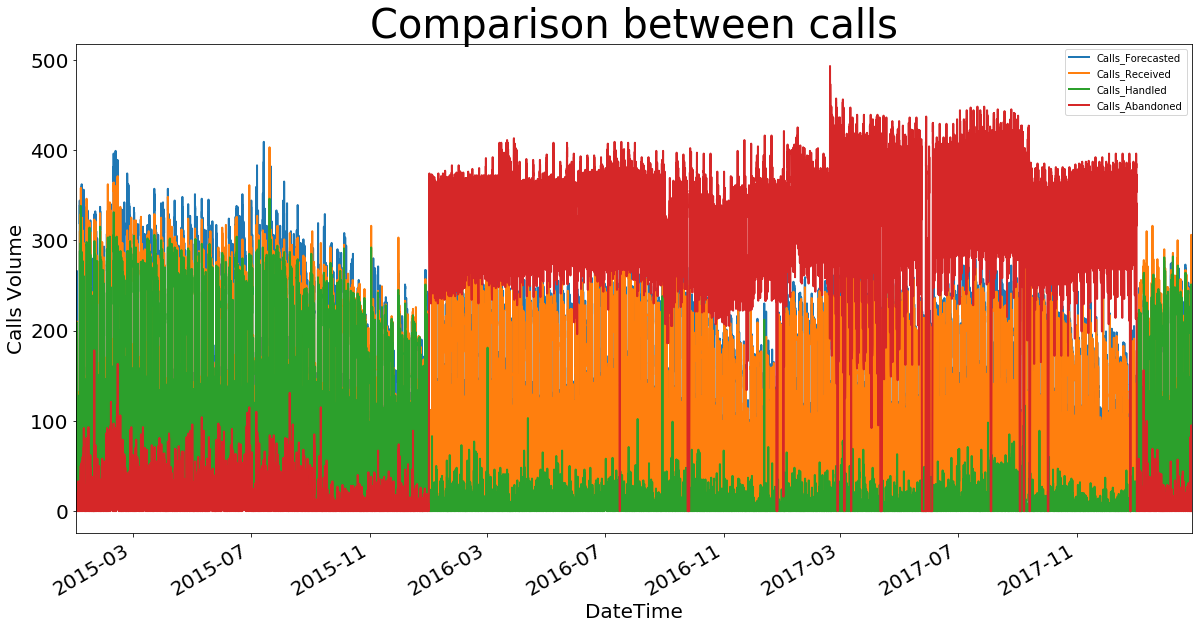

In [105]:
omni[['Calls_Forecasted','Calls_Received','Calls_Handled','Calls_Abandoned']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('DateTime',fontsize=20)
plt.ylabel('Calls Volume',fontsize = 20)
plt.title('Comparison between calls',fontsize = 40);

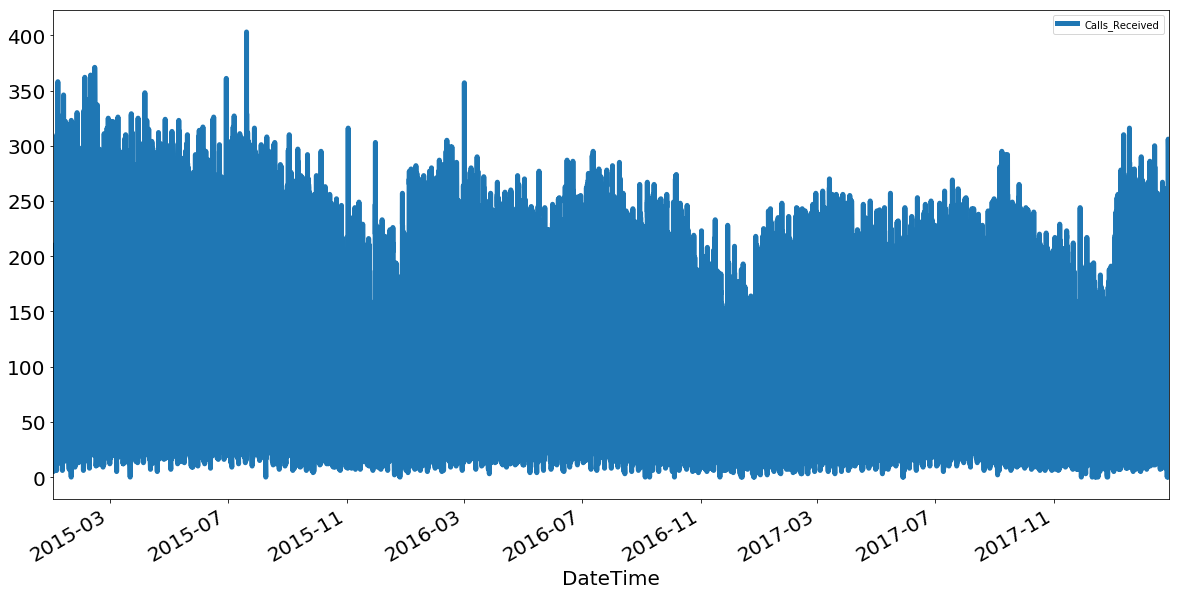

In [106]:
omni[['Calls_Received']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('DateTime', fontsize=20);

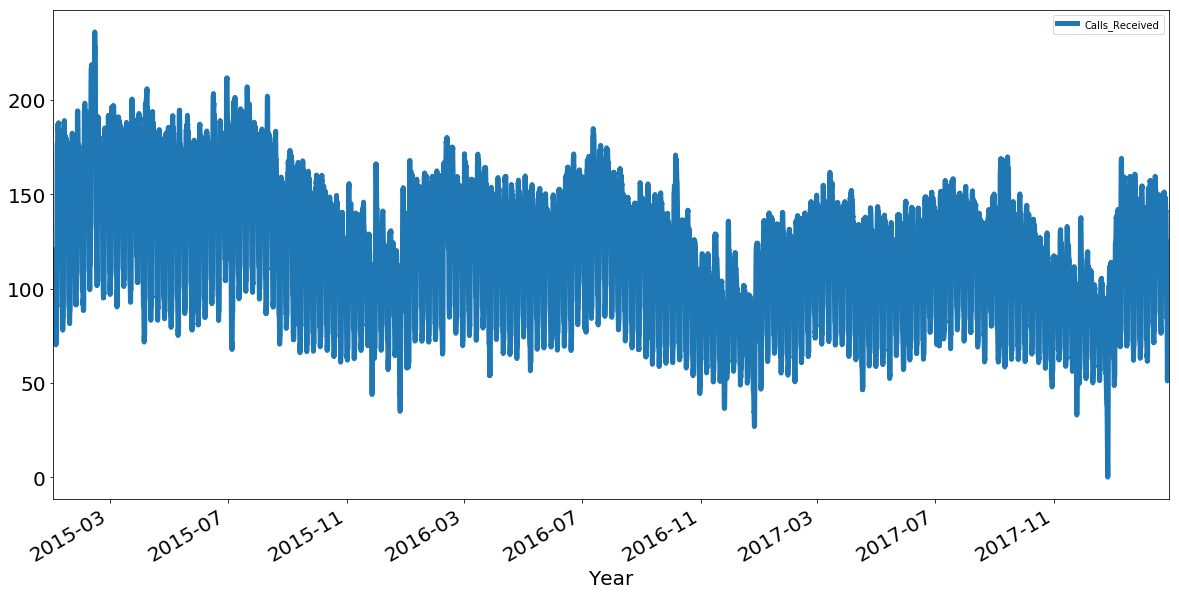

In [107]:
# Daily Calls Volume
calls = omni[['Calls_Received']]
calls.rolling(36).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [108]:
omni['Occupancy%'] = omni['Occupancy%'].str.rstrip('%').astype('float') / 100.0

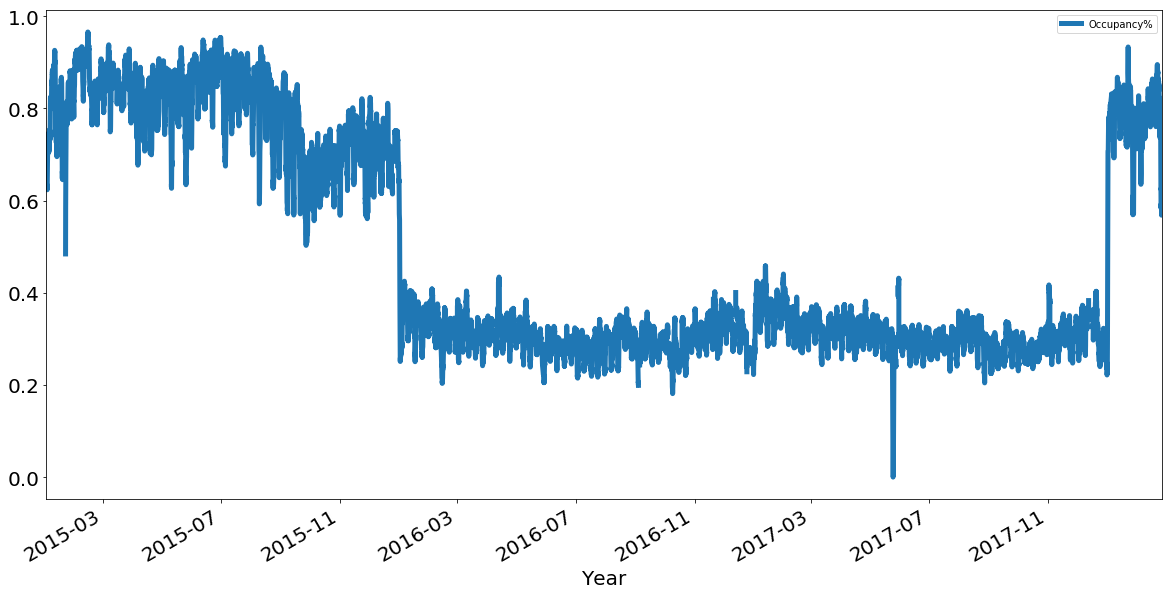

In [109]:
occupancy = omni[['Occupancy%']]
occupancy.rolling(36).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [110]:
omni['Service_Level%'] = omni['Service_Level%'].str.rstrip('%').astype('float') / 100.0

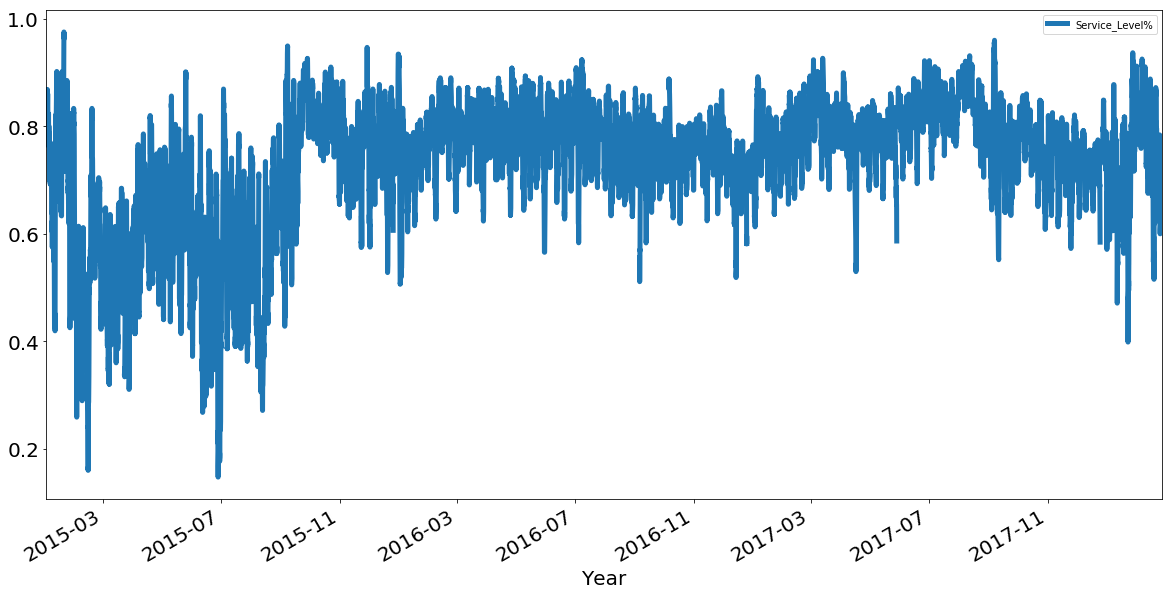

In [111]:
service = omni[['Service_Level%']]
service.rolling(36).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

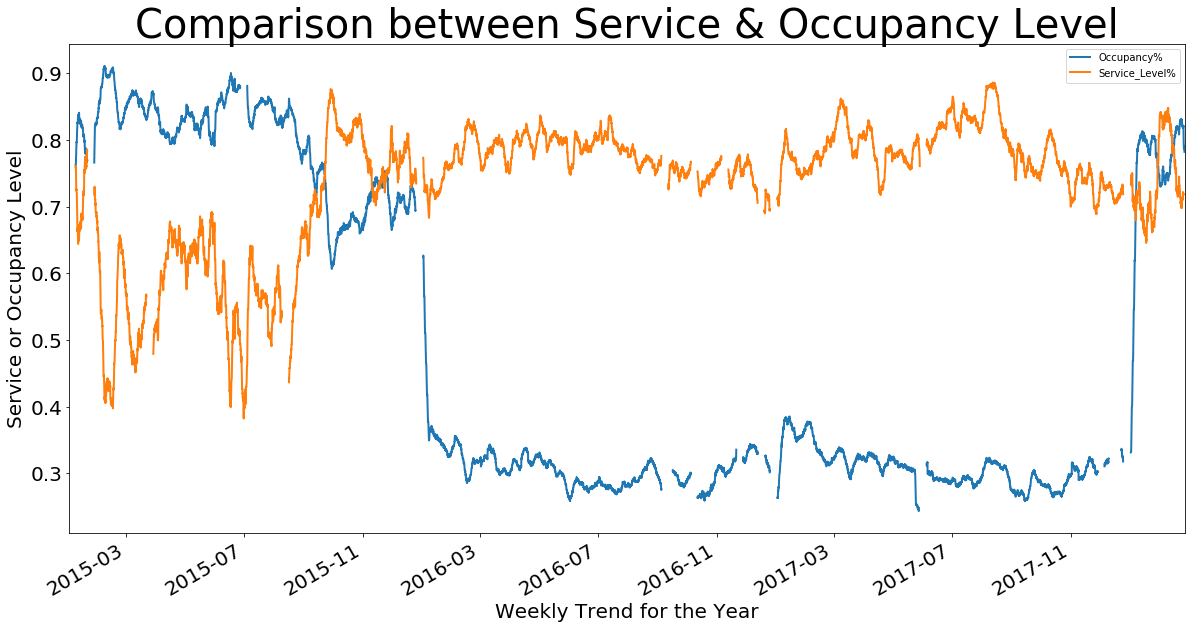

In [113]:
concat = pd.concat([occupancy.rolling(252).mean(), service.rolling(252).mean()], axis=1)
concat.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Weekly Trend for the Year', fontsize=20)
plt.ylabel('Service or Occupancy Level',fontsize = 20)
plt.title('Comparison between Service & Occupancy Level',fontsize = 40);

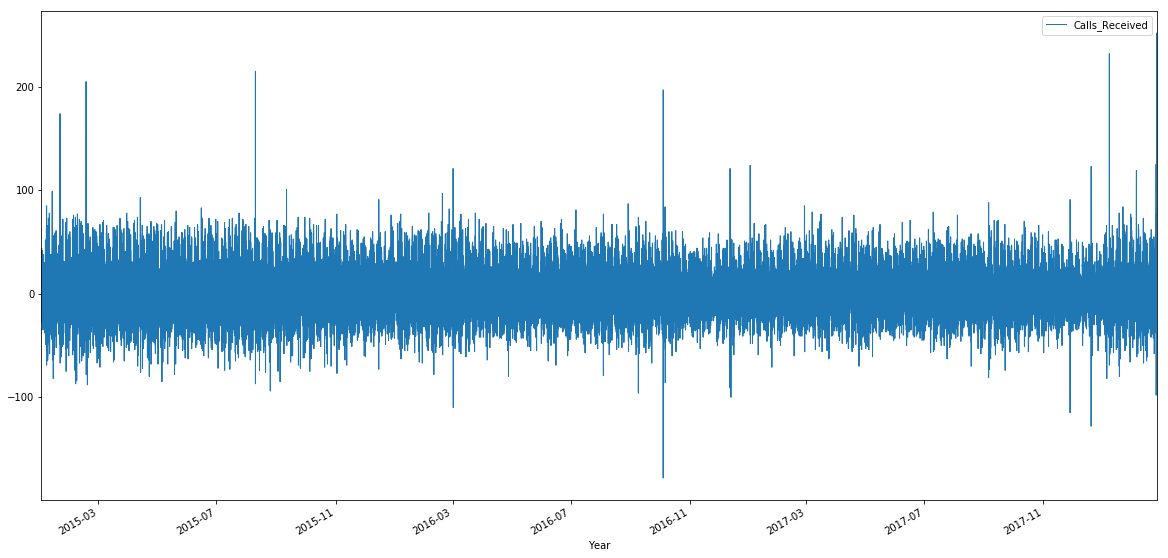

In [114]:
calls.diff().plot(figsize=(20,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

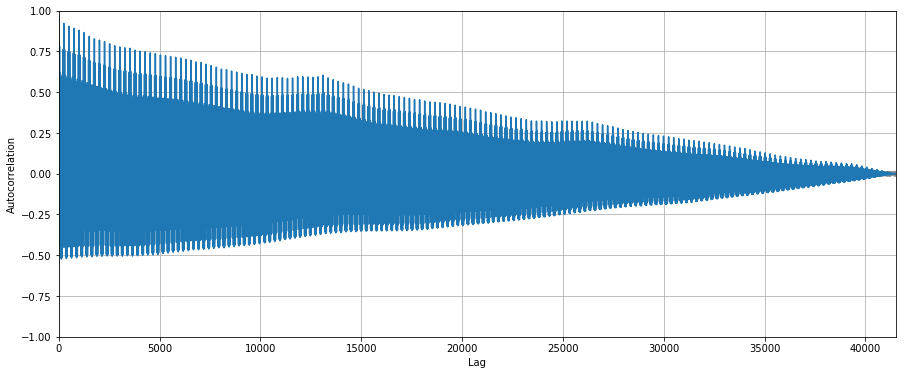

In [115]:
pd.plotting.autocorrelation_plot(calls);

### Stationary Testing

In [116]:
ts = calls

In [117]:
ts.head()

,Calls_Received
DateTime,
2015-01-01 06:00:00,6.0
2015-01-01 06:30:00,14.0
2015-01-01 07:00:00,28.0
2015-01-01 07:30:00,33.0
2015-01-01 08:00:00,39.0


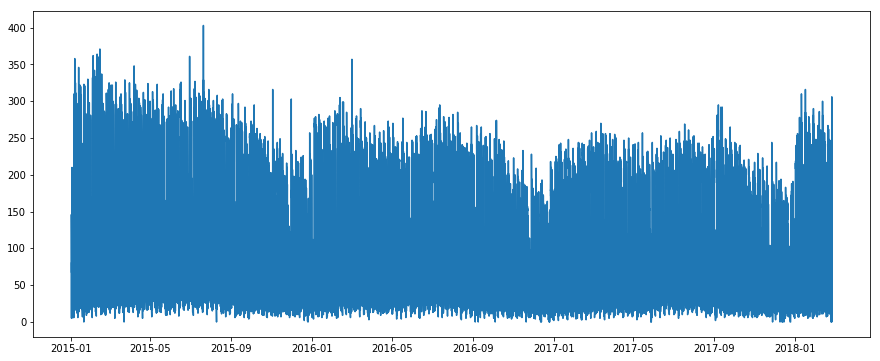

In [118]:
plt.plot(ts)

### Dickey - Fuller Testing to check stationarity

In [119]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=252)
    rolstd = pd.rolling_std(timeseries, window=252)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Model 1 : Checking Stationarity

C:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).mean()
  """
C:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).std()
  


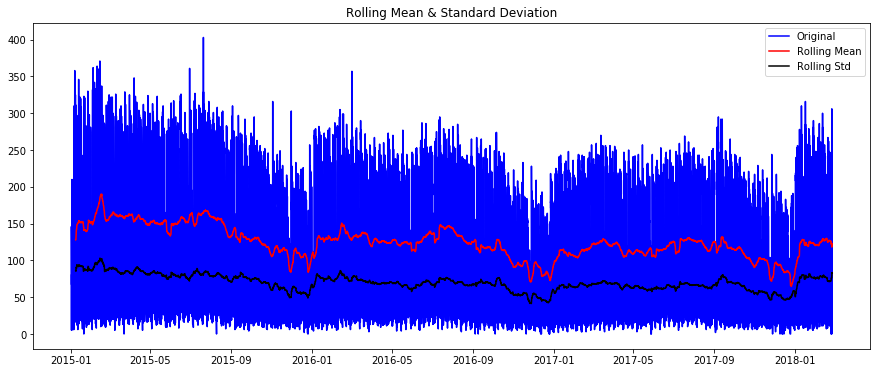

Results of Dickey-Fuller Test:
Test Statistic                   -20.237915
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41452.000000
Critical Value (1%)               -3.430508
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [120]:
test_stationarity(ts)

### Model 2  : Checking Stationarity

C:\python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


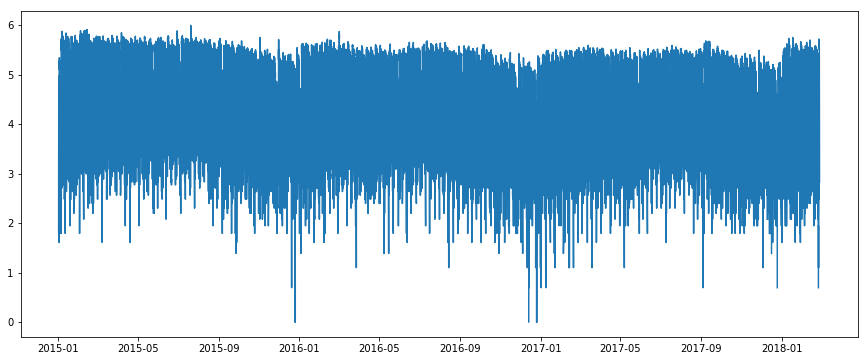

In [121]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).mean()
  """Entry point for launching an IPython kernel.


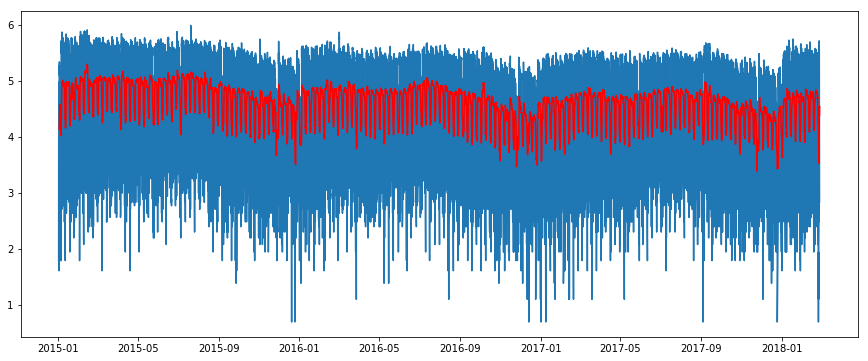

In [142]:
moving_avg = pd.rolling_mean(ts_log,36)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [143]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,Calls_Received
DateTime,
2015-01-01 06:00:00,NaN
2015-01-01 06:30:00,NaN
2015-01-01 07:00:00,NaN
2015-01-01 07:30:00,NaN
2015-01-01 08:00:00,NaN
2015-01-01 08:30:00,NaN
2015-01-01 09:00:00,NaN
2015-01-01 09:30:00,NaN
2015-01-01 10:00:00,NaN


C:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).mean()
  """
C:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).std()
  


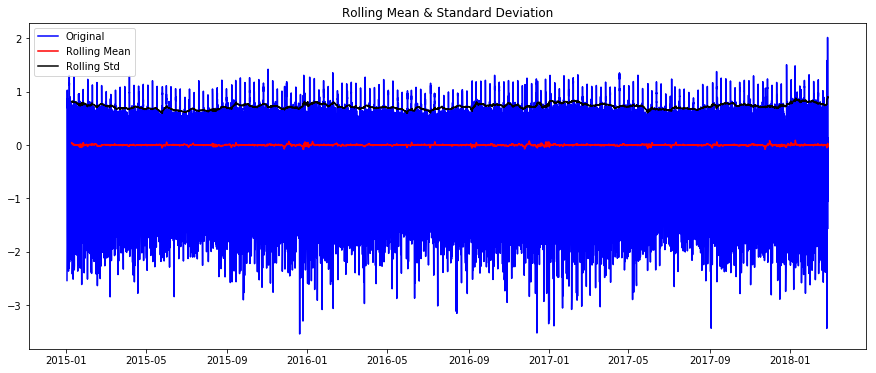

Results of Dickey-Fuller Test:
Test Statistic                   -31.073057
p-value                            0.000000
#Lags Used                        54.000000
Number of Observations Used    41309.000000
Critical Value (1%)               -3.430508
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [144]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


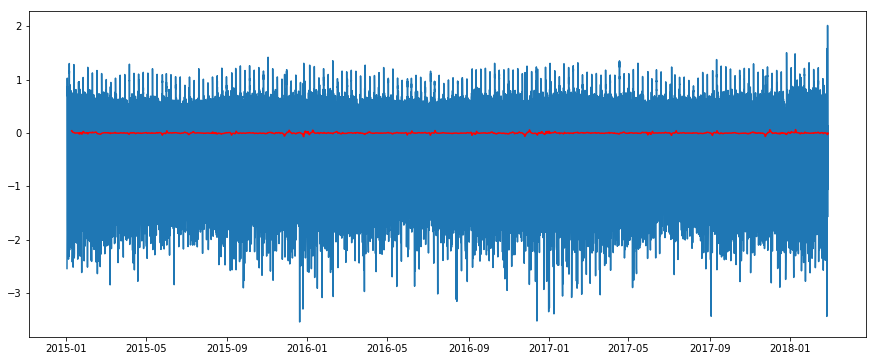

In [145]:
ts_log_moving_avg_diff.dropna(inplace=True)
expwighted_avg = pd.ewma(ts_log_moving_avg_diff.rolling(252).mean(), halflife=12)
plt.plot(ts_log_moving_avg_diff)
plt.plot(expwighted_avg, color='red')

In [152]:
ts_log.isnull().sum()
ts_log = ts_log[ts_log>0]
ts_log = ts_log.rolling(252).mean()

### Decomposing Time Series data into Trend, Seasonality & Randomness

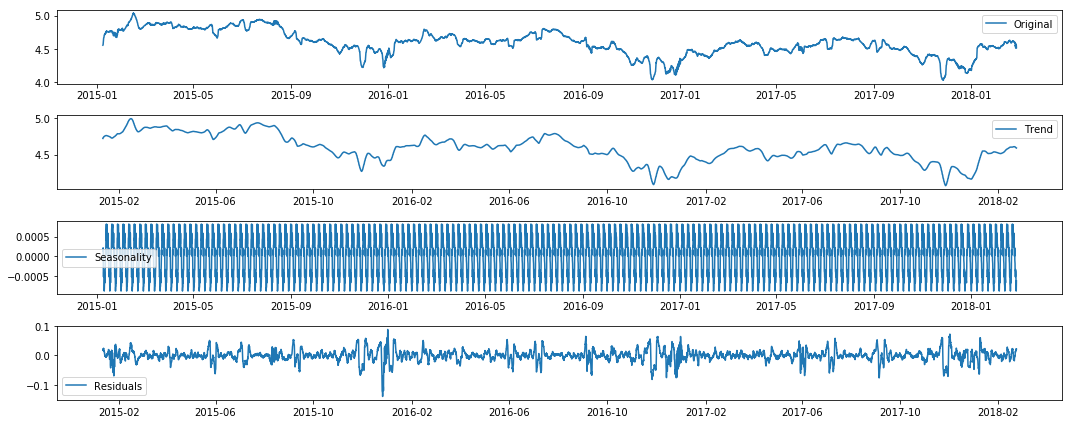

In [153]:
ts_log.dropna(inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model="additive", filt=None, freq=252)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Checking for Stationarity of Randomness

C:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).mean()
  """
C:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).std()
  


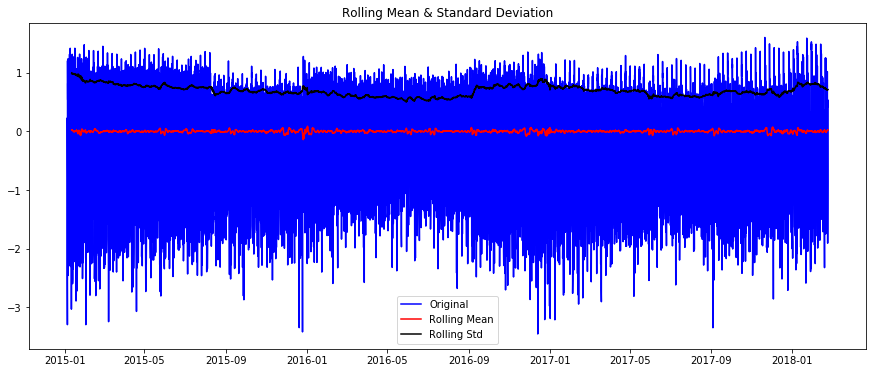

Results of Dickey-Fuller Test:
Test Statistic                   -30.047098
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41091.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [80]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [154]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [155]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

### Autocorrelation Function doesn't converge

Text(0.5,1,'Autocorrelation Function')

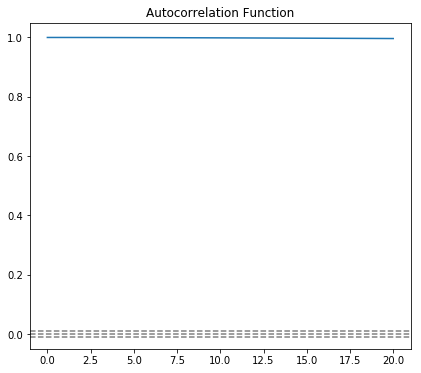

In [156]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

### Partial Autocorrelation does converge

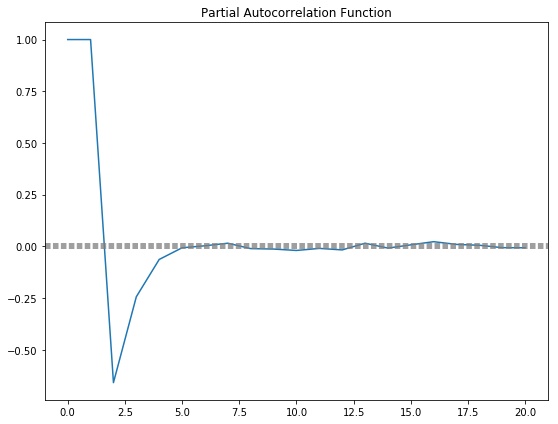

In [157]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Predicting using ARIMA

In [158]:
from statsmodels.tsa.arima_model import ARIMA

C:\python\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: Cannot add integral value to Timestamp without freq.

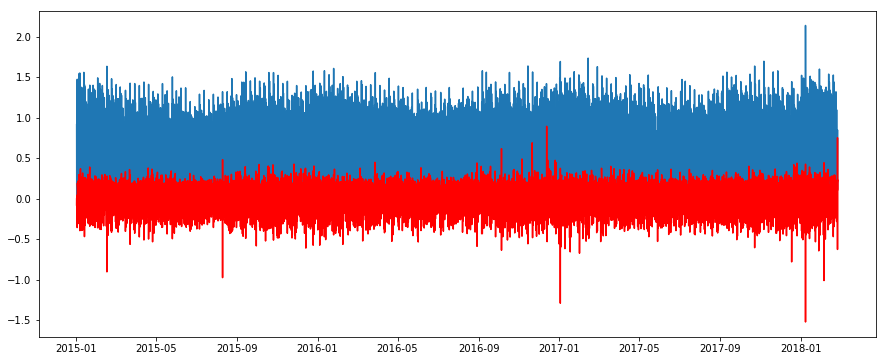

In [114]:
model = ARIMA(ts_log, order=(5, 2, 2))  
results_AR = model.fit(disp=0)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_moving_avg_diff)**2))

C:\python\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: Cannot add integral value to Timestamp without freq.

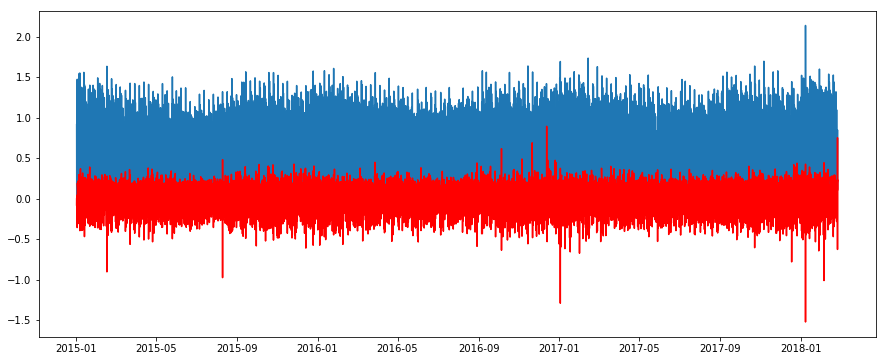

In [116]:
model = ARIMA(ts_log_moving_avg_diff, order=(5, 2, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_moving_avg_diff)**2))

In [ ]:
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_moving_avg_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

### Thank you!